# **Welcome to the Demo Notebook (*In Progress*)**

In this demo notebook we go through the `.py` modules used for the project and demonstrate their functionality.<br>
The notebook at this stage serves as the authors' means to track their progress but could later be turned into a main module. 

Below, we can begin with the steps taken throughout the project.


### **Step 1) The Dependencies**

The code for `package_installer` and the overall requirements module is taken from another DEDA quantlet, but amended to use pkg resources. Still, this part of the module requires more work and fine-tuning to be up-to-date with current standards. 

In [1]:
# Basic libraries
import re
import os
import gc
import gensim

C:\Users\baana\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### **Step 2) The Scraper**
Import the master_theses_scraper from the freshly added `thesis_scraper.py` module, docstring of which is given below. The function is constructed deliberately to produce many `print()` statements along the way to let the users know what stage of the work they are on and how this or that entry currently being processed looks like.

Also, to note, the scraping implementation is designed in a way that is specifically targeted at the HU website, meaning it will need some tinkering inside for repurposing. 


In [2]:
# Import the custom function and inspect
from thesis_scraper import master_theses_scraper 
master_theses_scraper?

Signature: master_theses_scraper(url, down_dir, headers)
Docstring:
Scrapes master's theses from a specified URL, retrieves download links, and downloads the theses.

Args:
    url (str): The URL of the webpage containing the LvB theses.
    down_dir (str): The directory where the scraped PDFs will be downloaded.
    headers (dict): HTTP headers to be used in the requests.
File:      c:\users\baana\documents\github\korp\deda\thesis_scraper.py
Type:      function


In [3]:
# Specify the link to scrape
url = 'https://www.wiwi.hu-berlin.de/de/forschung/irtg/lvb/research/dmb'

# Sets the directory for downloading our scraped pdfs
down_dir = 'OCRed PDFs/'

# Makes the directory in case it does not exist already
os.makedirs(down_dir, exist_ok = True)


# Set your own user agent here after ' User-Agent' Google: what is my user agent
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/113.0',
    'Accept-Language': 'en-US'
}

In [4]:
# Run the function:
master_theses_scraper(url = url,
                      down_dir = down_dir,
                      headers = headers
)

Scraping complete.
244 entries found.
An example entry in our links container looks like:
 <a data-linktype="external" data-val="https://edoc.hu-berlin.de/handle/18452/24455" href="https://edoc.hu-berlin.de/handle/18452/24455">Comparing Cryptocurrency Indices to Traditional Indices</a>


Identifying invalid links...
51 invalid links identified.
193 entries remain.
Identifying Master's Theses...
124 Master's Theses identified.
A sample entry looks as follows:
 <a href="https://edoc.hu-berlin.de/handle/18452/23881">App-based Forecasting of CRIX Index Returns Using R and R-Shiny</a>
Retrieving download links...
Due to missing link, dropped entry: <a href="http://edoc.hu-berlin.de/master/ristig-alexander-2012-02-03">Modelling of Vector MEM with Hierarchical Archimedean Copula</a>
Due to missing link, dropped entry: <a href="http://edoc.hu-berlin.de/master/schelisch-martin-2011-06-10">Jumps in High Frequency Data</a>
Due to missing link, dropped entry: <a href="http://edoc.hu-berlin.de/mast

## **Step 3) Pre-Processing**

1. The first thing that needs to be done is to check whether there are German language entries among our PDF files.
For this purpose, we have defined a function `de_detect` which takes as argument our directory and the files inside, scans them and removes the German entries.<br>

In [6]:
# Set folder as needed. 
folder = 'OCRed PDFs'
theses = os.listdir(folder) 


In [2]:
from lang_detect import de_detect

In [7]:
german_list = de_detect(folder, theses)

Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 1.master_garcia_gonzalo.pdf.
Currently working on 10.Masterarbeit_Bricke_Thomas.pdf.
10.Masterarbeit_Bricke_Thomas.pdf was identified as German.
10.Masterarbeit_Bricke_Thomas.pdf removed from directory
Currently working on 100.wang.pdf.
Currently working on 101.zeng.pdf.
Currently working on 102.gillette.pdf.
Currently working on 103.ignatieva.pdf.
Currently working on 104.giacomini.pdf.
Currently working on 105.du-moulinet-d-hardemare.pdf.
Currently working on 106.sebe-vodislav.pdf.
Currently working on 107.borak.pdf.
Currently working on 108.andriyashin.pdf.
Currently working on 109.chen.pdf.
Currently working on 11.master_agakishiev_ilyas.pdf.
Currently working on 110.detlefsen.pdf.
Currently working on 111.benko.pdf.
Currently working on 112.ulbricht.pdf.
Currently working on 113.aydinli.pdf.
Currently working on 114.zhou.pdf.
Currently working on 115.mungo.pdf.
Currently working on 116.giacom

In [9]:
# These two lines included inside the function from now on
print(f'We have identified in total {len(german_list)} German language documents. See below the full list:')
print(german_list)

We have identified in total 7 German language documents. See below the full list:
['10.Masterarbeit_Bricke_Thomas.pdf', '22.Masterarbeit_Frost_Oliver.pdf', '60.jaehrling.pdf', '87.myzickova.pdf', '89.reichelt.pdf', '93.ying.pdf', '99.pari-schatz.pdf']


In [1]:
# Clean memory
import gc
gc.collect()

344

With $7$ papers dropped, that leaves the amount fo scraped papers at $114$, with additional $11$ sourced from CDs and scanning the physical documents.
So, we can proceed to work with the $125$ documents in total.<br>

2. Now we move on to the preprocessing part using the function `preprocess_text` from text_prep.py

What does the function do?

For every document in our directory it:
- makes text lower case
- removes non alphabetic characters
- removes stop words
- removes single-character words and other possible PDF reading mistakes
- lemmatizes words
- renders the processed theses as `.txt` files

This helps significantly reduce dimensions and get rid of noise in our data.

**Additional Functionality (Very Costly):**

We have further included additional, but fairly computationally costly, funcitionality within the function that can be turned on by setting argument `verbose = True`.

Using this, the function will save and count the word tokens at every stage of the preprocessing and automately generate plots for additional insight into the dimensionality reduction process.

As its to costly computational power and memory-wise at this stage, the function can be used to process a smaller batch from the corpus and still give generalizable insight. 

**Using Function with Mini Batches:**

While not included inside the function yet, to save some computing power and memory, in the notebook we implement the function in a loop, going through five document in each iteration and collecting all memory, hoping it will speed up the process.

But, the function requires improving to have either multi-threading or batching functionality inside.

While unfortunately not at the authors' disposal, having access to GPUs would significantly increase speed with multi-threading functionality.

In [4]:
# Import function
from text_prep import preprocess_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# See function arguments
preprocess_text?

Signature:
preprocess_text(
    first_input_folder=None,
    theses=None,
    inter_output_folder=None,
    viz_folder=None,
    verbose=False,
)
Docstring:
Preprocesses the PDF files by making everything lowercase,
getting rid of non-alphabetic words, removing stopwords,
tokenizing, lemmatizing, removing words with less than 3 character.

Args:
    first_input_folder (str): Path to the folder containing the PDF files.
    
    theses: os.listdir(folder).
            
    inter_output_folder (str): Intermediate output folder to save the filtered theses.
    
    viz_folder (str): Folder to save vizualisations.
    
    verbose (bool): Returns vizualizations and information about dimensionality reduction. Can be set to False to save computational power, memory and time when working with large corpora of files.

Returns:
    None. Filthered theses saved in new folder.
File:      c:\users\baana\documents\github\korp\deda\text_prep.py
Type:      function


Below we run the script on the entire $125$ papers we have, with `verbose = False`.

In [5]:
# Set folders as needed. 
first_input_folder = 'OCRed PDFs'
theses = os.listdir(first_input_folder) 
inter_output_folder = 'Filtered Theses'
viz_folder = 'Plots' # This will remain empty as plotting functionality is deactivated.
os.makedirs(inter_output_folder, exist_ok = True)
os.makedirs(viz_folder, exist_ok = True)

In [11]:
# Run the function in batches

# Make a range loop from 0 to 125 by steps of 5
for i in range(21, len(theses), 5):
    
    # Define batch amount
    theses_batch = theses[i:i+5]
    
    # Place the function inside the loop
    preprocess_text(first_input_folder, theses_batch, inter_output_folder, viz_folder, verbose = False)
    
    # Collect garbage in hopes of memory-efficiency
    gc.collect()

Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 119.sebe-vodislav.pdf.
Currently working on 12.thesis_Bingling_Wang.pdf.
Currently working on 120.kervella.pdf.
Currently working on 121.ashu.pdf.
Currently working on 13.master_pulec_vojtech.pdf.
Preprocessing succesfully completed.


Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 14.master_pulec_vojtech.pdf.
Currently working on 15.masterarbeit_mitkov_ivan.pdf.
Currently working on 16.master_kostmann_michael.pdf.
Currently working on 17.master_perez_ivan.pdf.
Currently working on 18.master_keilbar_georg.pdf.
Preprocessing succesfully completed.


Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 19.master_pollack_david.pdf.
Currently working on 2.master_song_ranqing.pdf.
Currently working on 20.master_kolesnikova_alisa.pdf.
Currently working on 21.master_spilak_bruno.pdf.
Currently working on 23.master_cluzel_vict

***Disclaimer Note:*** <br>
Dropped `118.su.pdf` as it kept making the function freeze on any computer we tried on.

That also explains why cell output beings from thesis number $21$ and the loop also.

**End Result:**

We have successfully pre-processed $124$ MSc theses for LDA.

In [12]:
# Clear Memory 
gc.collect()

17

3. Now we move on to the final part of pre-processing, which is actually creating the corpus. 

The `corpusmaker` function we have designed takes as the input the folder where we stored the filtered theses, sets up a dictionary, creates ID mapping and sets up the corpus.

This functionality also includes one last step for further dimensionality reduction - removing words mentioned less than 3 times in the entire corpora of text.

In [7]:
from corpus_maker import corpusmaker
corpusmaker?

Signature: corpusmaker(input_folder=None, last_output_folder=None)
Docstring:
Function processes the already filtered theses and creates a corpus. Outputs are saved as pickle files for further use. 

Args:
    input_folder (str): The folder containing the filtered theses. Set to the output path of the preprocess_text function.
    last_output_folder (str): The folder to save the pickled data.
    
Returns:
    dictionary, dictionary_token2id, corpus
File:      c:\users\baana\documents\github\korp\deda\corpus_maker.py
Type:      function


In [8]:
input_folder = 'Filtered Theses'
last_output_folder = 'DICT_CORP'
os.makedirs(last_output_folder, exist_ok = True)

In [9]:
dictionary, dictionary_token2id, corpus = corpusmaker(input_folder, last_output_folder)

Creating corpus...
After removing 29397 rare words, total amount of words in the preprocessed texts decreased from 985996 to 956599
Corpus succesfully created.


*Note:* There are in total 956599 words in the corpus. But this **of course** does not mean that amount of **unique** words.

We can now call top five most frequent words per document which will allow us to have a better look at the documents.

This will allow us to make final adjustments to the pre-processing such as manually adding stopwords or excluding documents that could not be processed.


In [2]:
from corpus_maker import topwords

C:\Users\baana\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [10]:
topwords(corpus, dictionary, 5)

Thesis 1
model: 76
time: 46
use: 38
crix: 37
series: 35

Thesis 2
double: 287
distribution: 231
parameter: 179
gh: 128
original: 99

Thesis 3
smile: 132
iv: 125
price: 119
data: 116
strike: 110

Thesis 4
return: 396
market: 206
portfolio: 174
stock: 170
model: 141

Thesis 5
copula: 259
parameter: 175
panel: 112
dependence: 98
jump: 92

Thesis 6
copula: 215
distribution: 91
portfolio: 47
function: 42
risk: 41

Thesis 7
cid: 50683
bf: 533
fi: 98
fl: 84
bfb: 66

Thesis 8
default: 42
company: 41
use: 35
vector: 32
score: 32

Thesis 9
model: 138
time: 94
iv: 93
one: 90
function: 80

Thesis 10
tree: 175
cid: 97
data: 91
node: 91
decision: 64

Thesis 11
distribution: 130
density: 123
ic: 108
var: 96
estimate: 83

Thesis 12
cid: 367
learn: 91
time: 51
algorithm: 49
network: 47

Thesis 13
model: 250
option: 181
price: 156
hedge: 130
volatility: 125

Thesis 14
function: 120
evalarg: 118
functional: 98
matrix: 86
coef: 86

Thesis 15
function: 219
basis: 151
data: 132
spline: 129
use: 88

Thesis 1

**Fine Tuning:**

After inspecting the most frequent tokens per paper, we can do additional fine-tuning -- targeted specifically at our dataset -- to our preprocessing script to further decrease noise in the data.

It is evident that additional stopwords should be added in the preprocessing, such as *cid*, *et*, *al*, *figure*, *table* as well as as some other nonsensical pdf reading mistakes such as *ll*, *lll*, *llll* and so on. 

Furthermore, we need to manually drop two theses: `121.ashu` and `105.du-moulinet-d-hardemare`, relatively older documents,  as the pdf tool is unable to read them (*may be a problem with OCR*).

Since on the previous stage we also discovered that `118.su` also causes problems, we can manually remove the three from our directory, leaving us with $122$ papers in total.

Also, there it is need to manually remove a section in `aydinli.pdf` majority of which is just program code.


Below we  run the fine-tuned script again in batches and without plotting functionality.



In [2]:
# Import function
from text_prep import preprocess_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Set folders as needed. 
first_input_folder = 'OCRed PDFs'
theses = os.listdir(first_input_folder) 
inter_output_folder = 'Filtered Theses'
viz_folder = 'Plots' # This will remain empty as plotting functionality is deactivated.
os.makedirs(inter_output_folder, exist_ok = True)
os.makedirs(viz_folder, exist_ok = True)

In [4]:
# Rerun the function in batches

# Make a range loop from 0 to 125 by steps of 5
for i in range(0, len(theses), 5):
    
    # Define batch amount
    theses_batch = theses[i:i+5]
    
    # Place the function inside the loop
    preprocess_text(first_input_folder, theses_batch, inter_output_folder, viz_folder, verbose = False)
    
    # Collect garbage in hopes of memory-efficiency
    gc.collect()

Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 1.master_garcia_gonzalo.pdf.
Currently working on 100.wang.pdf.
Currently working on 101.zeng.pdf.
Currently working on 102.gillette.pdf.
Currently working on 103.ignatieva.pdf.
Preprocessing succesfully completed.


Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 104.giacomini.pdf.
Currently working on 106.sebe-vodislav.pdf.
Currently working on 107.borak.pdf.
Currently working on 108.andriyashin.pdf.
Currently working on 109.chen.pdf.
Preprocessing succesfully completed.


Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 11.master_agakishiev_ilyas.pdf.
Currently working on 110.detlefsen.pdf.
Currently working on 111.benko.pdf.
Currently working on 112.ulbricht.pdf.
Currently working on 114.zhou.pdf.
Preprocessing succesfully completed.


Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currentl

In [5]:
# Clean
gc.collect()

17

In [3]:
input_folder = 'Filtered Theses'
last_output_folder = 'DICT_CORP'
os.makedirs(last_output_folder, exist_ok = True)

In [4]:
from corpus_maker import corpusmaker

C:\Users\baana\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
# Note that by this we will rewrite previous variables
dictionary, dictionary_token2id, corpus = corpusmaker(input_folder, last_output_folder)

Creating corpus...
After removing 27597 rare words, total amount of words in the preprocessed texts decreased from 815555 to 787958
Corpus succesfully created.


In [6]:
from corpus_maker import topwords

In [7]:
topwords(corpus, dictionary, 5)

Thesis 1
model: 76
time: 46
use: 38
crix: 37
series: 35

Thesis 2
double: 287
distribution: 231
parameter: 179
gh: 128
original: 99

Thesis 3
smile: 132
iv: 125
price: 119
data: 116
strike: 110

Thesis 4
return: 396
market: 206
portfolio: 174
stock: 170
model: 141

Thesis 5
copula: 259
parameter: 175
panel: 112
dependence: 98
jump: 92

Thesis 6
copula: 215
distribution: 91
portfolio: 47
function: 42
risk: 41

Thesis 7
default: 42
company: 41
use: 35
vector: 32
score: 32

Thesis 8
model: 138
time: 94
iv: 93
one: 90
function: 80

Thesis 9
tree: 175
data: 91
node: 91
decision: 64
class: 62

Thesis 10
distribution: 130
density: 123
ic: 108
var: 96
estimate: 83

Thesis 11
learn: 91
time: 51
algorithm: 49
network: 47
use: 43

Thesis 12
model: 250
option: 181
price: 156
hedge: 130
volatility: 125

Thesis 13
function: 120
evalarg: 118
functional: 98
matrix: 86
coef: 86

Thesis 14
function: 219
basis: 151
data: 132
spline: 129
use: 88

Thesis 15
course: 157
factor: 122
variable: 100
data: 87
st

The results look fairly normal. But note that there is always room for more imporvement.

### Attempting the Full Functionality (Incl. Plotting) 
The function used on this stage had additional memory-saving functionalities added, such as garbage collection, deleting variables inside the loop, etc.


In [3]:
import re
import os
import gc


In [2]:
# Set folders as needed. 
first_input_folder = 'OCRed PDFs'
theses = os.listdir(first_input_folder) 
inter_output_folder = 'outp'# A different output folder
viz_folder = 'Plots' # This will remain empty as plotting functionality is deactivated.
os.makedirs(inter_output_folder, exist_ok = True)
os.makedirs(viz_folder, exist_ok = True)

In [5]:
from text_prep import preprocess_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Current working directory: C:\Users\baana\Documents\GitHub\KORP\Deda
Currently working on 1.master_garcia_gonzalo.pdf.
Currently working on 100.wang.pdf.
Currently working on 101.zeng.pdf.
Currently working on 102.gillette.pdf.
Currently working on 103.ignatieva.pdf.
Currently working on 104.giacomini.pdf.
Currently working on 106.sebe-vodislav.pdf.
Currently working on 107.borak.pdf.
Currently working on 108.andriyashin.pdf.
Currently working on 109.chen.pdf.
Currently working on 11.master_agakishiev_ilyas.pdf.
Currently working on 110.detlefsen.pdf.
Currently working on 111.benko.pdf.
Currently working on 112.ulbricht.pdf.
Currently working on 114.zhou.pdf.
Currently working on 115.mungo.pdf.
Currently working on 116.giacomini.pdf.
Currently working on 117.jiao.pdf.
Currently working on 119.sebe-vodislav.pdf.
Currently working on 12.thesis_Bingling_Wang.pdf.
Currently working on 120.kervella.pdf.
Currently working on 13.master_pulec_vojtech.pdf.
Currently working on 14.master_pulec_v

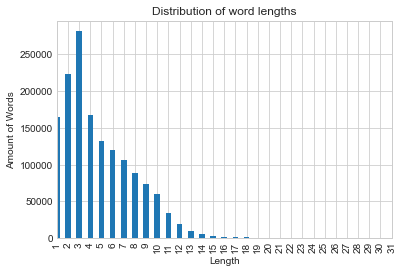



Total amount of words before dropping single character words: 1506416 




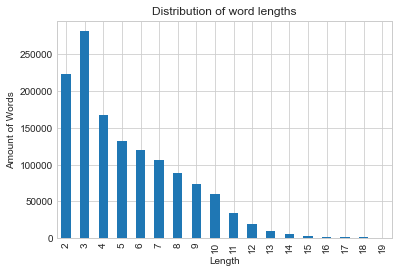



Total amount of words after dropping single character words and other pdf reader mistakes: 1328043 




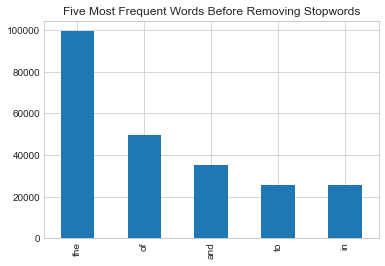



Total amount of words before removing stopwords: 1328043




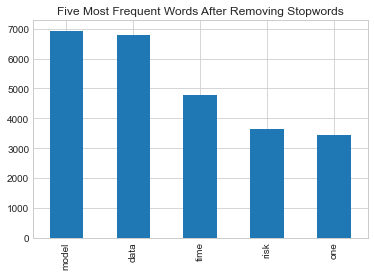



Total amount of words after removing stopwords: 817776




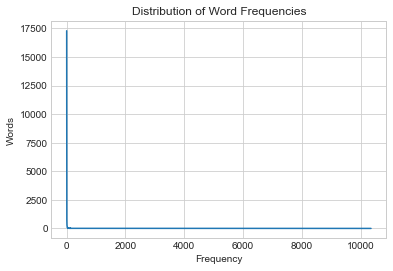

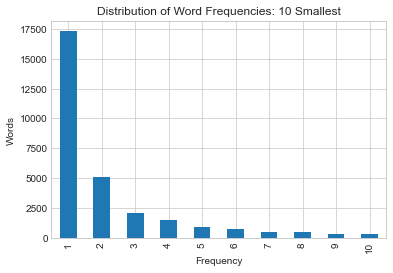



Preprocessing succesfully completed.




In [4]:
preprocess_text(first_input_folder, theses, inter_output_folder, viz_folder, verbose = True)


After launching the function at $17:00$, it ended at $17:48$.

In [1]:
import gc

In [2]:
gc.collect()

232

*What next?*<br>
We need one more plot that will show the final most frequent words (post-lemmatization).

In [4]:
import pickle

with open('DICT_CORP/corpus.pkl', 'rb') as file:
    corpus = pickle.load(file)
    
with open('DICT_CORP/dictionary_token2id.pkl', 'rb') as file:
    dictionary_token2id = pickle.load(file)
    
with open('DICT_CORP/dictionary.pkl', 'rb') as file:
    dictionary = pickle.load(file)
    


C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
from corpus_maker import wordcloud


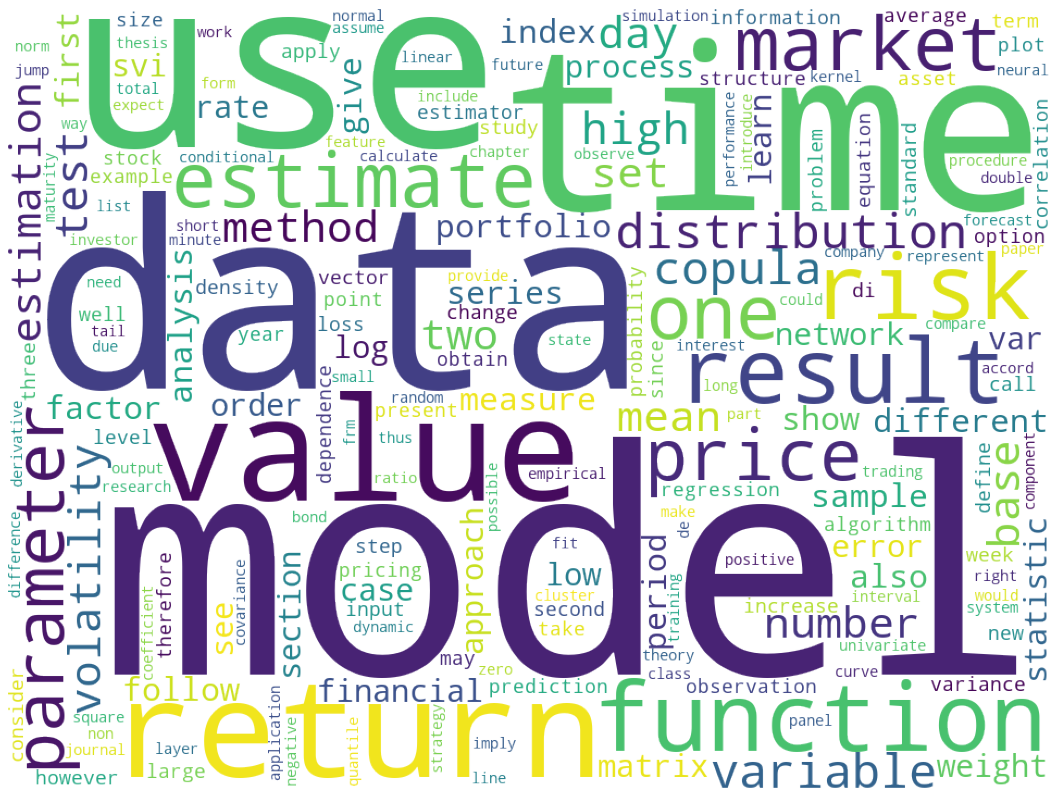

In [5]:
wordcloud(corpus, dictionary)

### The corpus maker class:



In [1]:
from corpus_maker import CorpusMaker

C:\Users\baana\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
corp_maker = CorpusMaker(input_folder = 'Filtered Theses', last_output_folder = 'CLASS OUTP')

In [4]:
dictionary, dictionary_token2id, corpus, texts = corp_maker.make_corpus()

Creating corpus...
After removing 27597 rare words, total amount of words in the preprocessed texts decreased from 815555 to 787958
Corpus succesfully created.


In [ ]:
corp_maker.show_top_words(amount = 5)

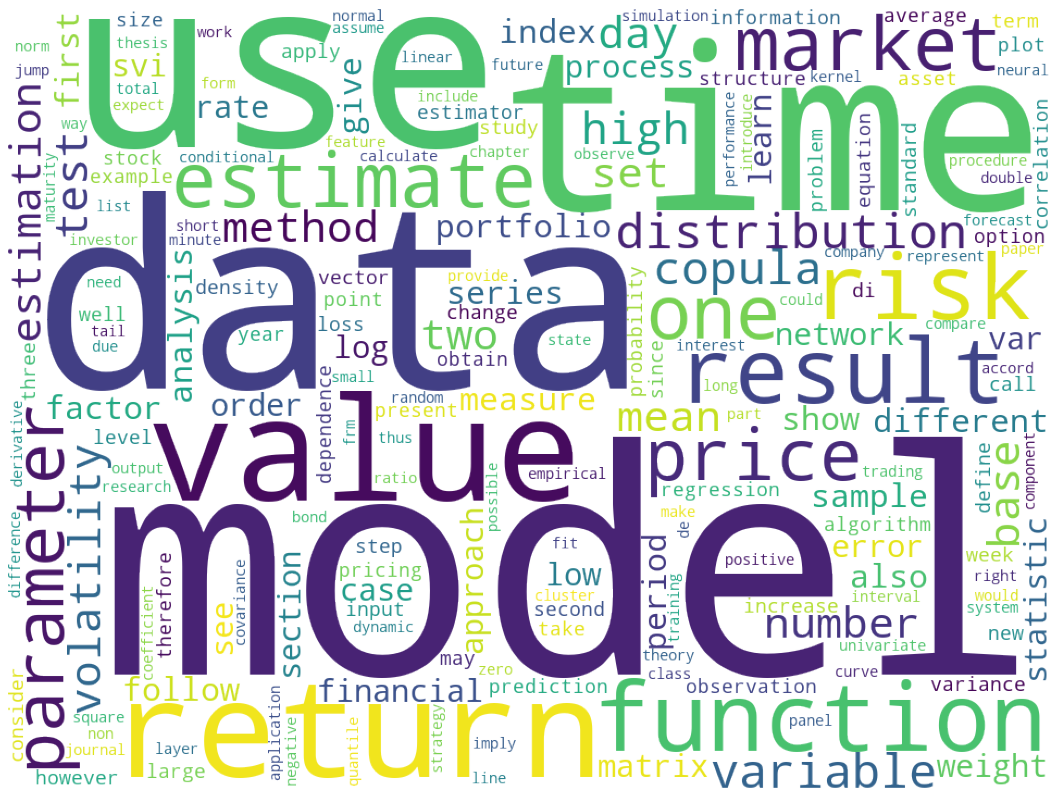

In [7]:
corp_maker.make_wordcloud()

### LDA Trial


In [12]:
pip install pyLDAvis --user


  Using cached pyLDAvis-3.4.0-py3-none-any.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -U scikit-learn

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pyLDAvis


In [9]:
import gensim

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
import pyLDAvis.gensim_models as gensimvis

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
from gensim.models import CoherenceModel

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Basic LDA attempt

m = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                   id2word = dictionary,
                                   num_topics = 10,
                                   random_state = 100,
                                   update_every = 1,
                                   chunksize = 100,
                                   passes = 10,
                                   alpha = 'symmetric',
                                   per_word_topics = True,
                                   eta = 0.6)

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(m.print_topics())

savedmodel = m[corpus]

[(0, '0.013*"model" + 0.011*"price" + 0.010*"volatility" + 0.009*"use" + 0.008*"option" + 0.008*"time" + 0.007*"estimate" + 0.007*"risk" + 0.007*"function" + 0.007*"value"'), (1, '0.024*"bond" + 0.018*"return" + 0.013*"private" + 0.012*"risk" + 0.012*"equity" + 0.011*"market" + 0.010*"loss" + 0.010*"earthquake" + 0.010*"model" + 0.010*"test"'), (2, '0.017*"model" + 0.010*"recipe" + 0.010*"time" + 0.010*"data" + 0.008*"use" + 0.007*"base" + 0.007*"network" + 0.007*"user" + 0.007*"lstm" + 0.006*"series"'), (3, '0.010*"model" + 0.010*"data" + 0.009*"variable" + 0.006*"value" + 0.006*"use" + 0.005*"one" + 0.004*"analysis" + 0.004*"result" + 0.004*"method" + 0.004*"matrix"'), (4, '0.015*"data" + 0.009*"use" + 0.008*"model" + 0.007*"base" + 0.007*"sentiment" + 0.007*"portfolio" + 0.007*"cluster" + 0.006*"number" + 0.006*"measure" + 0.006*"word"'), (5, '0.016*"model" + 0.014*"day" + 0.013*"svi" + 0.011*"frm" + 0.011*"week" + 0.010*"market" + 0.010*"period" + 0.008*"di" + 0.007*"risk" + 0.006*

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
pyLDAvis.enable_notebook()
viz = gensimvis.prepare(m, corpus, dictionary)
viz

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\baana\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.057971 -0.021713       1        1  23.762151
3     -0.002423  0.051290       2        1  17.203889
5     -0.011569  0.018549       3        1  10.142600
8      0.119141  0.047103       4        1   9.709703
4     -0.035902  0.058228       5        1   9.442741
7      0.049569 -0.011708       6        1   9.406501
2     -0.073429  0.116473       7        1   8.155338
1      0.077918 -0.146842       8        1   4.660167
9      0.018381 -0.016452       9        1   4.413553
6     -0.199657 -0.094928      10        1   3.103357, topic_info=         Term         Freq        Total Category  logprob  loglift
3558   copula  2382.000000  2382.000000  Default  30.0000  30.0000
921    return  3420.000000  3420.000000  Default  29.0000  29.0000
2544     bond  1039.000000  1039.000000  Default  28.0000  28.0000
926      risk  3748.000000  3748.000000  Default  27.0000  27.0000
267       day  2293.000000  2293.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
118     block    80.503446   381.605216  Topic10  -5.7162   1.9166
1741  require    79.793907   450.116346  Topic10  -5.7251   1.7426
837     price    99.778935  3090.070740  Topic10  -5.5016   0.0397
1111      use   105.717377  5277.301393  Topic10  -5.4437  -0.4377
921    return    93.767492  3420.959431  Topic10  -5.5637  -0.1242

[716 rows x 6 columns], token_table=      Topic      Freq Term
term                      
6         1  0.134914   ac
6         2  0.081766   ac
6         3  0.057236   ac
6         4  0.012265   ac
6         5  0.678656   ac
...     ...       ...  ...
1182      6  0.086332   zu
1182      7  0.036350   zu
1182      8  0.013631   zu
1182      9  0.013631   zu
1182     10  0.327154   zu

[4019 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 6, 9, 5, 8, 3, 2, 10, 7])

In [13]:
print(f'Perplexity: {m.log_perplexity(corpus)}')

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: -7.569107083665669


In [15]:
CoherenceModel?

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Init signature:
CoherenceModel(
    model=None,
    topics=None,
    texts=None,
    corpus=None,
    dictionary=None,
    window_size=None,
    keyed_vectors=None,
    coherence='c_v',
    topn=20,
    processes=-1,
)
Docstring:     
Objects of this class allow for building and maintaining a model for topic coherence.

Examples
---------
One way of using this feature is through providing a trained topic model. A dictionary has to be explicitly provided
if the model does not contain a dictionary already

.. sourcecode:: pycon

    >>> from gensim.test.utils import common_corpus, common_dictionary
    >>> from gensim.models.ldamodel import LdaModel
    >>> from gensim.models.coherencemodel import CoherenceModel
    >>>
    >>> model = LdaModel(common_corpus, 5, common_dictionary)
    >>>
    >>> cm = CoherenceModel(model=model, corpus=common_corpus, coherence='u_mass')
    >>> coherence = cm.get_coherence()  # get coherence value

Another way of using this feature is through providing t

In [15]:
cm = CoherenceModel(model = m,
                   texts = texts, 
                   corpus = corpus, 
                   dictionary = dictionary,
                   coherence = 'c_v')


C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
coherence_of_m = cm.get_coherence()
print(f'Coherence Score: ', coherence_of_m)

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.41333769702907147


In [59]:
import gensim
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np

class LDA:
    '''
    A custom LDA interface designed to carry out a grid search, find the best model and vizualize it. 
    Grid search carried out per coherence instead of perplexity, as optimizing for the latter may not lead to "human interpretable topics."
    
    Args:
    
        corpus: A bag of words corpus (Already generated by CorpusMaker)
        dictionary: A gensim dictionary (Already generated by CorpusMaker)
        texts: All tokens (Already generated by CorpusMaker)
        
    How to use:
        
        MSc_LDA = LDA(corpus, dictionary, texts) <-- initializes the class
        MSc_LDA.grid_search(n_topics, alphas, betas) <-- conducts grid search
        MSc_LDA.lineplot_scores() <-- plots coherence scores from grid search rounds
        m = MSc_LDA.build_best_model() <-- fits best model
        MSc_LDA.viz() <-- vizualizes best model
        
    '''
    
    def __init__ (self, corpus, dictionary, texts):
        
        # Below the usual def __init__ items: Those selected by the user
        self.corpus = corpus
        self.dictionary = dictionary
        self.texts = texts
        
        # Below the grid search items, that will get overwritten per search iteration
        # Set to none because it gets selected by the algorithm
        self.best_params = None
        
        # Since coherence score ranges from 0 to 1, we should initialize the best score as as anything below 0
        self.best_score = -1
        
        # Set to none due to reason mentioned
        self.best_model = None
        
    def get_coherence_score(self, n, alpha, beta):
        
        '''
        Calculates the coherence score per model using gensim's CoherenceModel.
        
        Args:
            n: Number of topics in one LDA model (per iteration of search)
            alpha: Document-Topic Density
            beta: Topic-Word Density
            
        Returns:
            Coherence score, fitted LDA model.
            
        '''
        
        m = gensim.models.LdaModel(corpus = self.corpus,
                                   id2word = self.dictionary,
                                   num_topics = n,
                                   random_state = 66,  # Custom random state used in our project
                                   update_every = 1,
                                   chunksize = 100,
                                   passes = 10,
                                   alpha = alpha, # Alpha grabbed from function arguments
                                   per_word_topics = True,
                                   eta = beta # beta grabbed from function arguments
        )
        
        cm = CoherenceModel(model = m,
                            texts = self.texts,
                            corpus = self.corpus,
                            dictionary = self.dictionary,
                            coherence = 'c_v'
                           )
        
        # Returns the variables defined above
        # This comes in handy when fitting the best model after grid search
        return cm.get_coherence(), m
        
    def grid_search(self, n_topics, alphas, betas, verbose = False):
        
        '''
        Performs grid search, finding optimal LDA parameters
        
        Args:
            n_topics: list of possible topic number (can use list(range( ,)))
            alphas: list of alpha values (can use np.arange( , , ).tolist())
            betas: list of beta values (can use np.arange( , , ).tolist())
            verbose: If set to true, will give information about the number of topics, alpha and beta values and their coherence score per iteration

        Returns:
            self.scores: Coherence and perplexity scores for all LDA models tried out in grid search. 
        '''
        # Empty container for scores
        self.scores = []
        # Begin loop
        for n in n_topics:
            for alpha in alphas:
                for beta in betas:
                    
                    # Get coherence score and model
                    coherence_score, model = self.get_coherence_score(n, alpha, beta)
                    # Get perplexity score from model
                    perplexity_score = model.log_perplexity(self.corpus)
                    
                    # Append into empty container for scores
                    self.scores.append({'n_topics': n,
                                        'alpha': alpha,
                                        'beta': beta,
                                        'coherence_score': coherence_score,
                                        'perplexity_score': perplexity_score,
                       })
                    
                    # The if statement will always be valid in the first iteration
                    # but it will give the best score at the end of the run
                    
                    if coherence_score > self.best_score:
                        self.best_score = coherence_score
                        self.best_params = (n, alpha, beta)
                        self.best_model = model
                    
                    # This gives a very long print output in case of large grid search
                    # so it is only activated if verbose = True
                    if verbose:
                        print(f'Number of topics: {n}; alpha: {alpha}; beta: {beta}; Achieved coherence score: {coherence_score}')
                        
        scores_df = pd.DataFrame(self.scores)
        scores_df.to_csv('scores_from_search', index = False)
        
        
    def lineplot_scores(self):
        '''
        Constructs line plot with number of topics in LDA model on X axis and respective coherence and peplexity scores on Y axis.
        '''
  
        # Plot configuration 
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.rcParams['figure.figsize'] = [12, 6.75]

        # Use list comprehension to extract the variables we need for plotting 
        topics = [n_topic['n_topics'] for n_topic in self.scores]
        coherence_scores = [score['coherence_score'] for score in self.scores]
        perplexity_scores = [score['perplexity_score'] for score in self.scores]
            
        # Initialize subplots
        fig1, ax1 = plt.subplots()
            
        ax1.set_xlabel('Number of Topics')
        ax1.set_ylabel('Coherence Score')
        ax1.plot(topics, coherence_scores)
        fig1.tight_layout()
        plt.savefig('Coherence_Scores.png', dpi = 300, transparent = True)
        plt.show()
        plt.close()
            
        fig2, ax2 = plt.subplots()       
        ax2.set_xlabel('Number of Topics')
        ax2.set_ylabel('Perplexity')
        ax2.plot(topics, perplexity_scores)
            
        fig2.tight_layout()
        plt.savefig('Perplexity_Scores.png', dpi = 300, transparent = True)        
        plt.show()
        plt.close()
        
        
        # NOTE:
        # This plotting may not be the best option given that we have many variables.
        # We could consider other options. 
        
    
    def build_best_model(self):
        
        '''
        Fits the best model found during the grid search.
        
        Returns:
            The LDA model.
        '''
        
        # A neat line of if statetement included as a flex
        if self.best_params:
            n, alpha, beta = self.best_params
            
            # We do not need the coherence score so leave first blank
            _, model = self.get_coherence_score(n, alpha, beta)
            
            # Save the model to be able to load it via Gensim later
            model.save('MSc_LDA.gensim')
            
            topics = model.print_topics()
            for t in topics:
                print(t)
                
            # Further save the topics as a csv
            
            with open('topics.csv', 'w', newline = '') as f:
                writer = csv.writer(f)
                writer.writerow(['Topic N', 'Keywords'])
                for t in topics:
                    writer.writerow(t)
                    
            return model
         
        else:
            raise Exception('No parameters found for the best model. Make sure you have run the grid search already.')

    
    def viz(self):
        
        '''
        Visualizes the optimal LDA model found by gridsearch using pyLDAvis
        
        Returns:
            The visualizations
        '''
        if self.best_model:
            pyLDAvis.enable_notebook()
            viz = gensimvis.prepare(self.best_model, self.corpus, self.dictionary)
            return viz
        else:
            raise Exception('Could not find best model. Try doing a grid search and building the best model.')
                        

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
LDA?

Init signature: LDA(corpus, dictionary, texts)
Docstring:     
A custom LDA interface designed to carry out a grid search, find the best model and vizualize it. 
Grid search carried out per coherence instead of perplexity, as optimizing for the latter may not lead to "human interpretable topics."

Args:

    corpus: A bag of words corpus (Already generated by CorpusMaker)
    dictionary: A gensim dictionary (Already generated by CorpusMaker)
    texts: All tokens (Already generated by CorpusMaker)
    
How to use:
    
    MSc_LDA = LDA(corpus, dictionary, texts) <-- initializes the class
    MSc_LDA.grid_search(n_topics, alphas, betas) <-- conducts grid search
    MSc_LDA.lineplot_scores() <-- plots coherence scores from grid search rounds
    m = MSc_LDA.build_best_model() <-- fits best model
    MSc_LDA.viz() <-- vizualizes best model
    
Type:           type
Subclasses:     


C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# Initialize optimizer
msc_lda = LDA(corpus, dictionary, texts)

# Set up parameter grid
n_topics = list(range(2,4))
alphas = np.arange(0.1, 0.2, 0.1).tolist()
betas = np.arange(0.1, 0.2, 0.1).tolist()

## I append these two by hand to the gird
# because I'm not skilled enough to have included them in the upper lines of code
alphas.append('symmetric')
betas.append('auto')


C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# Do the grid search
msc_lda.grid_search(n_topics, alphas, betas, verbose = True)

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 2; alpha: 0.1; beta 0.1; Achieved coherence score: 0.3202236665689895
Number of topics: 2; alpha: 0.1; beta auto; Achieved coherence score: 0.3236646155723931
Number of topics: 2; alpha: symmetric; beta 0.1; Achieved coherence score: 0.3202236665689895
Number of topics: 2; alpha: symmetric; beta auto; Achieved coherence score: 0.3236646155723931
Number of topics: 3; alpha: 0.1; beta 0.1; Achieved coherence score: 0.3445151463796791
Number of topics: 3; alpha: 0.1; beta auto; Achieved coherence score: 0.33701046741330654
Number of topics: 3; alpha: symmetric; beta 0.1; Achieved coherence score: 0.3445151463796791
Number of topics: 3; alpha: symmetric; beta auto; Achieved coherence score: 0.33701046741330654


C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


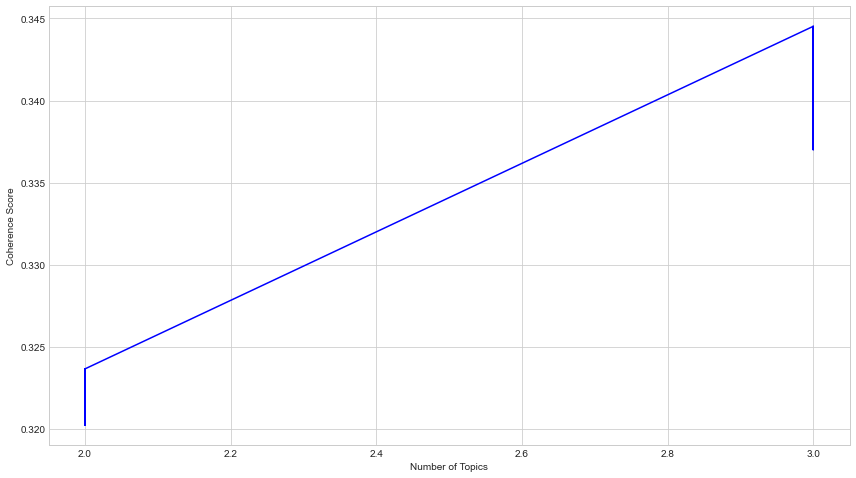

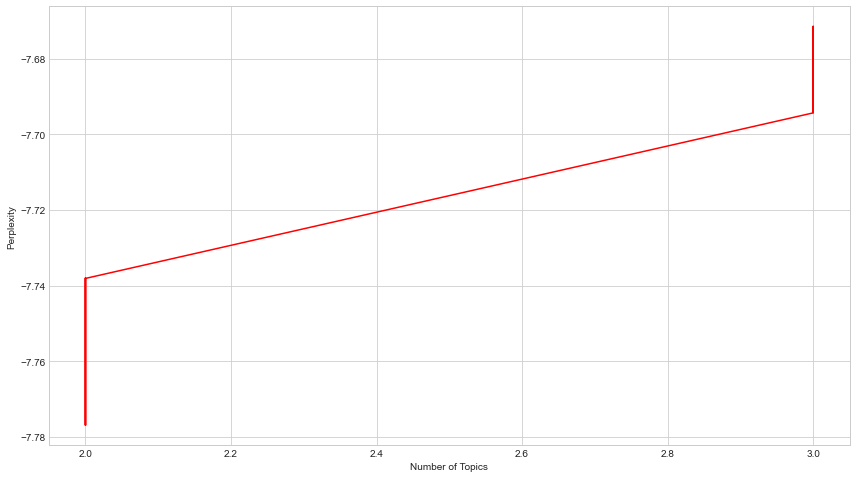

In [69]:
msc_lda.lineplot_scores()

In [70]:
# Save best model
m = msc_lda.build_best_model()

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.010*"data" + 0.009*"return" + 0.008*"model" + 0.007*"use" + 0.007*"market" + 0.006*"time" + 0.006*"value" + 0.005*"base" + 0.005*"network" + 0.005*"function"')
(1, '0.013*"model" + 0.010*"risk" + 0.010*"time" + 0.009*"estimate" + 0.008*"bond" + 0.008*"copula" + 0.008*"price" + 0.008*"use" + 0.008*"data" + 0.007*"function"')
(2, '0.015*"model" + 0.010*"data" + 0.008*"variable" + 0.007*"use" + 0.006*"value" + 0.006*"result" + 0.005*"one" + 0.004*"high" + 0.004*"set" + 0.004*"day"')


In [72]:
msc_lda.viz()

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\baana\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.023242 -0.107921       1        1  43.584286
1     -0.127150  0.037677       2        1  34.486581
0      0.103908  0.070244       3        1  21.929133, topic_info=          Term         Freq        Total Category  logprob  loglift
3558    copula  2130.000000  2130.000000  Default  30.0000  30.0000
2544      bond  2528.000000  2528.000000  Default  29.0000  29.0000
921     return  4106.000000  4106.000000  Default  28.0000  28.0000
838    pricing  1779.000000  1779.000000  Default  27.0000  27.0000
724    network  1336.000000  1336.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
920     result   632.929600  3478.928104   Topic3  -5.6095  -0.1868
47    analysis   565.915143  2083.207461   Topic3  -5.7214   0.2141
752        one   578.618033  3349.353062   Topic3  -5.6992  -0.2385
1499      high   559.885951  2765.431559   Topic3  -5.7321  -0.0799
186    company   548.123429  1910.461335   Topic3  -5.7533   0.2688

[286 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2443      1  0.127498  address
2443      2  0.026971  address
2443      3  0.848350  address
7276      1  1.002457   adrian
41        1  0.481320     also
...     ...       ...      ...
1913      1  0.208348     word
1913      2  0.069449     word
1913      3  0.722604     word
6580      1  0.998168      xbt
4957      1  0.998727      xmr

[460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [75]:
from LDA_with_Grid import LDA

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
LDA?

C:\Users\baana\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Init signature: LDA(corpus, dictionary, texts)
Docstring:     
A custom LDA interface designed to carry out a grid search, find the best model and vizualize it. 
Grid search carried out per coherence instead of perplexity, as optimizing for the latter may not lead to "human interpretable topics."

Args:

    corpus: A bag of words corpus (Already generated by CorpusMaker)
    dictionary: A gensim dictionary (Already generated by CorpusMaker)
    texts: All tokens (Already generated by CorpusMaker)
    
How to use:
    
    MSc_LDA = LDA(corpus, dictionary, texts) <-- initializes the class
    MSc_LDA.grid_search(n_topics, alphas, betas) <-- conducts grid search
    MSc_LDA.lineplot_scores() <-- plots coherence scores from grid search rounds
    m = MSc_LDA.build_best_model() <-- fits best model
    MSc_LDA.viz() <-- vizualizes best model
    
File:           c:\users\baana\documents\github\korp\deda\lda_with_grid.py
Type:           type
Subclasses:     
